<a href="https://colab.research.google.com/github/snghynn/handsonml/blob/main/%ED%95%B8%EC%A6%88%EC%98%A8_ch4_%EB%AA%A8%EB%8D%B8%ED%9B%88%EB%A0%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 4 모델훈련

#### 선형 회귀

1. 직접 계산할 수 있는 공식 사용하여 훈련 세트에 가장 잘 맞는 모델 파라미터를 해석적으로 구하기

2. 경사 하강법(GD): 모델 파라미터를 조금씩 바꾸면서 비용 함수 최소


#### 다항 회귀
- 선형 회귀보다 파라미터가 많아 훈련 데이터에 과대적합되기 쉬움
- 학습 곡선 사용해 모델 과적합 감지

#### logistic, softmax


## 4.1 선형 회귀
- 모델 훈련: 모델이 훈련 세트에 가장 잘 맞도록 모델 파라미터를 설정하는 것
- RMSE를 최소화하는 계수 찾기


### 4.1.1 정규방정식
- 정규방정식: 비용 함수를 최소화하는 theta값 찾기 위한 해석적인 방법(수학 공식)

In [8]:
# 정규방정식 테스트 위한 선형처럼 보이는 데이터 생성
import numpy as np

X=2*np.random.rand(100,1)
y=4+3*X+np.random.randn(100,1)

In [9]:
# 정규방정식 사용해 theta hat 계산
X_b=np.c_[np.ones((100,1)),X] # 모든 샘플에 x0=1 추가
theta_best=np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [10]:
#정규방정식으로 계산한 값 확인
theta_best

array([[4.17322147],
       [2.85159487]])

> 잡음 때문에 원래 함수의 파라미터를 정확하게재현하지 못함

In [11]:
# theta hat을 사용해 예측
X_new=np.array([[0],[2]])
X_new_b=np.c_[np.ones((2,1)),X_new] #  모든 샘플에 x0=1 추가
y_predict=X_new_b.dot(theta_best)
y_predict

array([[4.17322147],
       [9.87641121]])

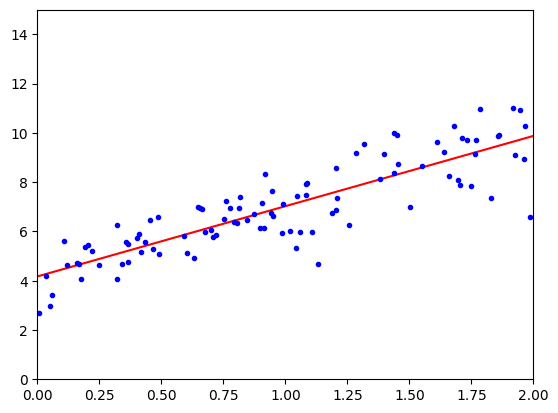

In [12]:
# 모델의 예측 그래프에 나타내기
import matplotlib.pyplot as plt

plt.plot(X_new, y_predict, "r-")
plt.plot(X,y,"b.")
plt.axis([0,2,0,15])
plt.show()

In [13]:
# 사이킷런 선형회귀
from sklearn.linear_model import LinearRegression

lin_reg=LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_, lin_reg.coef_

(array([4.17322147]), array([[2.85159487]]))

In [14]:
lin_reg.predict(X_new)

array([[4.17322147],
       [9.87641121]])

In [15]:
theta_best_svd, residuals, rank, s=np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.17322147],
       [2.85159487]])

In [16]:
# 유사역행렬 구하기
np.linalg.pinv(X_b).dot(y)

array([[4.17322147],
       [2.85159487]])

## 4.2 경사 하강법
- 경사 하강법: 여러 종류의 문제에서 최적의 해법을 찾을 수 있는 일반적인 최적화 알고리즘
- 비용 함수를 최소화
- 골짜기로 내려가는 가장 가파른 길을 따라 아래로 내려가기
- 파라미터 벡터에 대해 비용 함수의 현재 그레디언트를 계산 후 그레디언트가 감소하는 방향으로 진행
- 그레디언트가 0이 되면 최솟값에 도달

- 무작위 초기화: theta를 임의의 값으로 시작해 비용함수(MSE 등)가 감소하는 방향으로 진행해 알고리즘이 최솟값으로 수렴할 때까지 점진적으로 향상

- 학습률: 경사 하강법에서 중요한 파라미터 스텝의 크기

- 경사 하강법을 사용할 때는 모든 특성이 같은 스케일을 갖도록 만들어야 함(StandardScaler)


### 4.2.1 배치 경사 하강법
- 편도 함수: theta가 조금씩 변경될 때 비용 함수가 얼마나 바뀌는가


In [17]:
# 경사 하강법 스텝 알고리즘 고현
eta=0.1 # 학습률
n_iterations=1000
m=100

theta=np.random.randn(2,1) # 무작위 초기화

for iteration in range(n_iterations):
  gradients=2/m*X_b.T.dot(X_b.dot(theta)-y)
  theta=theta-eta*gradients

In [18]:
theta

array([[4.17322147],
       [2.85159487]])

> 정규 방정식으로 찾은 것과 같은 결과. 경사 하강법이 완벽하게 작동

- 적절한 학습률 찾기 위해 그리드 탐색 사용
- 그리드 탐색에서 수렴하는 데 오래 걸리는 모델을 막기 위해 반복 횟수 제한해야 함

- 허용오차: 반복 횟수를 크게 지정하고 그레디언트 벡터가 작아져 허용 오차보다 작아지면 경사 하강법이 거의 최솟값에 도달. -> 알고리즘 중지


### 4.2.2 확률적 경사 하강법
- 매 스텝에서 한 개의 샘플을 "무작위(확률적)"로 선택하고 그 하나의 샘플에 대한 그레디언트를 계산
- 지역 최솟값을 건너뛸 수도 있도록 도와주므로 배치 경사 하강법보다 전역 최솟값을 찾을 가능성이 높음

- 단점: 무작위성을 전역 최솟값에서 탈출시켜서 좋지만 알고리즘을 전역 최솟값에 다다르지 못하게 함
  - 해결: 학습률을 점진적으로 감소

In [19]:
# 학습 스케줄을 사용한 확률적 경사 하강법의 구현
n_epochs = 50
t0, t1 = 5,50   # 학습 스케줄 하이퍼파라미터

def learning_schedule(t):
  return t0 / (t + t1)

theta = np.random.randn(2,1)   # 무작위 초기화

for epoch in range(n_epochs):
  for i in range(m):
    random_index = np.random.randint(m)
    xi = X_b[random_index:random_index+1]
    yi = y[random_index:random_index+1]
    gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
    eta = learning_schedule(epoch * m + i)
    theta = theta - eta * gradients

In [21]:
theta

array([[4.21438034],
       [2.8235919 ]])

In [22]:
# 사이킷런에서 SGD 방식으로 선형 회귀
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter = 1000, tol = 1e-3, penalty = None, eta0 = 0.1)  # max_iter : 최대 에포크 횟수. tol : 손실이 줄어들 때까지 실행되는 기준. eta0 : 학습률. penalty : 규제
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [23]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.1206225]), array([2.9167622]))

### 4.2.3 미니배치 경사 하강법
- 미니배치라 부르는 임의의 작은 샘플 세트에 대해 그레디언트를 계산
- 장점) 행렬 연산에 최적화된 하드웨어 사용 -> 성능 향상


## 4.3 다항 회귀
- 가지고 있는 데이터가 단순 직선보다 복잡한 형태인 경우
- 다항 회귀: 확장된 특성을 포함한 데이터셋에 선형 모델을 훈련시키는 것

In [24]:
# 2차 방정식으로 비선형 데이터 생성
m=100
X=6*np.random.rand(m,1)-3
y=0.5 * X**2 + X + 2 + np.random.randn(m,1)

In [26]:
# 사이킷런의 polynomialFeatures 사용해 훈련 데이터 변환
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-2.51555272])

In [27]:
X_poly[0]

array([-2.51555272,  6.32800547])

In [28]:
# linear regression 적용
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.00864009]), array([[1.00420651, 0.44114997]]))

> - 특성이 여러 개일 때 다항회귀는 이 특성 사이의 관계를 찾을 수 있음
- polynomialfeatures를 적용하면 특성 사이의 관계(ab, ab^2 등)까지 알아낼 수 있음

## 4.4 학습 곡선
- 학습 곡선: 훈련 세트와 검증 세트의 모델 성능을 훈련 세트 크기의 함수로 나타냄
- 그래프를 생성하기 위해 단순히 훈련 세트에서 크기가 다른 서브 세트를 만들어 모델을 여러 번 훈련시키면 됨


In [29]:
# 훈련 데이터에서 모델의 학습 곡선을 그리는 함수 정의
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
  X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
  train_errors, val_errors = [], []
  for m in range(1, len(X_train)):
    model.fit(X_train[:m], y_train[:m])
    y_train_predict = model.predict(X_train[:m])
    y_val_predict = model.predict(X_val)
    train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))

  plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="training set")
  plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="validation set")
  plt.ylim([0, 3.0])
  plt.xlabel('Train Set Size')
  plt.ylabel('RMSE')
  plt.legend()

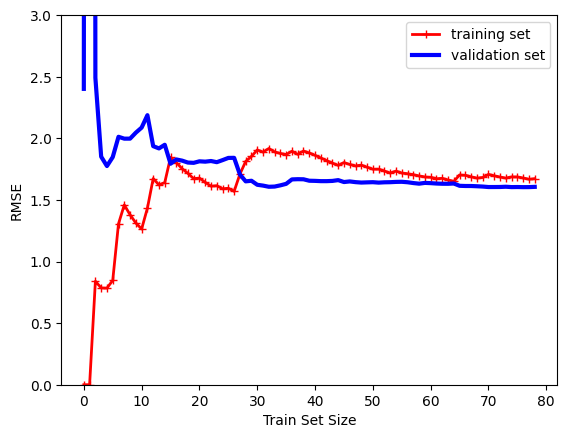

In [30]:
# 단순 선형 회귀 모델(직선)의 학습 곡선
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

> - 그래프가 평편해질때까지 오차가 계속 상승
  - 이 위치에서는 훈련 세트에 샘플이 추가되어도 평균 오차가 크게 나아지거나 나빠지지 않음
- 적은 수의 훈련 샘플로 훈련될 때는 제대로 일반화될 수 없어서 검증 오차가 초기에 매우 큼
- 모델에 훈련 샘플이 추가됨에 따라 학습이 되고 검증 오차 감소
- 선형 회귀의 직선은 데이터를 잘 모델링할 수 없으므로 오차의 감소가 완만해져서 훈련 세트의 그래프와 가까워짐

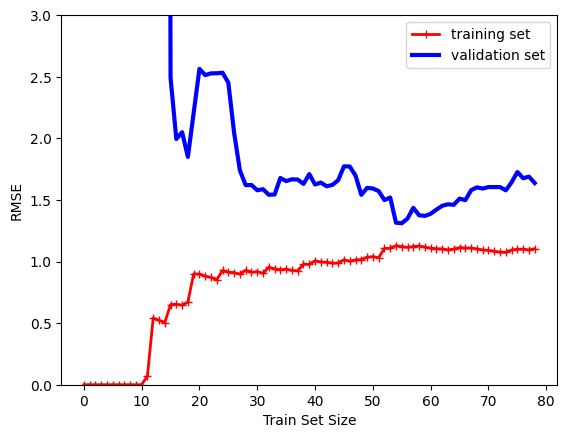

In [31]:
# 10차 다항 회귀 모델의 학습 곡선
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression()),
])
plot_learning_curves(polynomial_regression, X, y)

## 4.5 규제가 있는 선형 모델

### 4.5.1 릿지 회귀
- 규제항이 비용 함수에 추가

In [33]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[4.76173449]])

In [34]:
# 확률적 경사 하강법 사용 시
sgd_reg = SGDRegressor(penalty='l2')
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([4.72914235])

### 4.5.2 라쏘 회귀

In [35]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X,y)
lasso_reg.predict([[1.5]])

array([4.71299508])

### 4.5.3 엘라스틱넷

In [37]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio = 0.5)
elastic_net.fit(X,y)
elastic_net.predict([[1.5]])

array([4.71367647])

### 4.5.4 조기 종료
- 조기 종료: 경사 하강법과 같은 반복적인 학습 알고리즘 규제. 검증 에러가 최솟값에 도달하면 바로 훈련을 중지시키는 것
- 검증 에러가 최소에 도달하는 즉시 훈련을 멈춤

In [40]:
# 조기종료를 위한 기본적인 구현 코드
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler
X_train, X_val, y_train, y_val=train_test_split(X, y, test_size=0.2)

#데이터 준비
poly_scaler = Pipeline([
    ("poly_features", PolynomialFeatures(degree=90, include_bias = False)),
    ("std_scaler", StandardScaler())
])
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=None, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005)

minimum_val_error = float("inf")
best_epoch = None
best_model = None

for epoch in range(1000):
  sgd_reg.fit(X_train_poly_scaled, y_train)
  y_val_predict = sgd_reg.predict(X_val_poly_scaled)
  val_error = mean_squared_error(y_val, y_val_predict)
  if val_error < minimum_val_error:
    minimum_val_error = val_error
    best_epoch = epoch
    best_model = clone(sgd_reg)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

## 4.6 로지스틱 회귀
- 로지스틱 회귀: 샘플이 특정 클래스에 속할 확률 추정
- eg) 이메일이 스팸일 확률
- 이진 분류기 : 추정 확률이 50%가 넘으면 모델은 그 샘플이 해당 클래스에 속한다고 예측

### 4.6.3 결정 경계


In [41]:
# 꽃잎의 너비를 기반으로 iris-versicolor 종을 감지하는 분류기
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [42]:
X = iris['data'][:,3:] #꽃잎의 너비
y = (iris['target']==2).astype(np.int) #Iris-virginica면 1, 그렇지 않으면 0

<ipython-input-42-646e739d0ce0>:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = (iris['target']==2).astype(np.int) #Iris-virginica면 1, 그렇지 않으면 0


In [43]:
#로지스틱 회귀 모델 훈련
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X,y)

LogisticRegression()

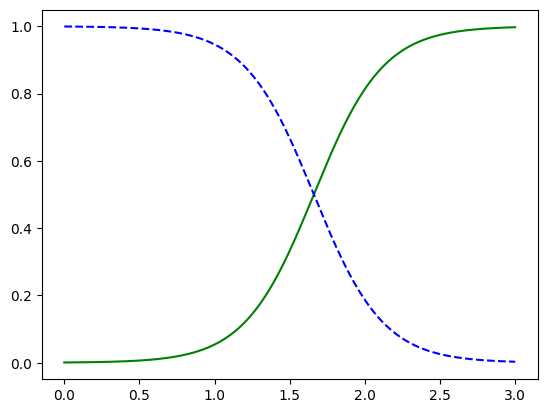

In [44]:
# 꽃잎의 너비가 0~3cm 인 꽃에 대해 모델의 추정 확률 계산
X_new = np.linspace(0,3,1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], 'g-', label = 'Iris virginica')
plt.plot(X_new, y_proba[:, 0], 'b--', label = 'not iris virginica')

- 양쪽의 확률이 똑같이 50%가 되는 1.6cm 근방에서 결정 경계

- 꽃잎 너비가 1.6cm보다 크면 분류기는 Iris-Verginica로 분류하고 그보다 작으면 아니라고 예측할 것임

In [45]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

### 4.6.4 소프트맥스 회귀
- 소프트맥스 회귀: 여러 개의 이진 분류기를 훈련시켜 연결하지 않고 직접 다중 클래스를 지원화도록 일반화

In [46]:
X = iris["data"][:, (2,3)]
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10)
softmax_reg.fit(X,y)

LogisticRegression(C=10, multi_class='multinomial')

In [47]:
softmax_reg.predict([[5,2]])

array([2])

In [48]:
softmax_reg.predict_proba([[5,2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])